# Kernel PCA 
### if there is non- linearity in  the dataset then we can use kernel PCA. to reduce the dimension.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### dependent and independent variable

In [5]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [6]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### splitting data into train_test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [9]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [10]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [12]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [13]:
print(X_test)

[[-7.98950822e-01  4.94607583e-01]
 [-2.12648508e-02 -5.77359062e-01]
 [-3.12897090e-01  1.46942725e-01]
 [-7.98950822e-01  2.62831011e-01]
 [-3.12897090e-01 -5.77359062e-01]
 [-1.09058306e+00 -1.44652121e+00]
 [-7.01740076e-01 -1.59138156e+00]
 [-2.15686344e-01  2.14601566e+00]
 [-1.96547978e+00 -5.58617754e-02]
 [ 8.53631867e-01 -7.80163563e-01]
 [-7.98950822e-01 -6.06331134e-01]
 [-9.93372315e-01 -4.32498705e-01]
 [-1.18475597e-01 -4.32498705e-01]
 [ 7.59458956e-02  2.04886868e-01]
 [-1.77105829e+00  4.65635512e-01]
 [-6.04529329e-01  1.36376973e+00]
 [-1.18475597e-01  2.04886868e-01]
 [-1.86826903e+00  4.36663440e-01]
 [ 1.63131784e+00  1.74040666e+00]
 [-3.12897090e-01 -1.38857706e+00]
 [-3.12897090e-01 -6.64275277e-01]
 [ 8.53631867e-01  2.14601566e+00]
 [ 2.70367388e-01 -5.48386991e-01]
 [ 8.53631867e-01  1.01610487e+00]
 [-1.47942605e+00 -1.21474464e+00]
 [ 1.04805336e+00  2.05909944e+00]
 [-9.93372315e-01  4.94607583e-01]
 [-8.96161568e-01  2.91803083e-01]
 [-1.18475597e-01 -2

### Applying KernalPCA

In [14]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test  = kpca.transform(X_test)

#### Visualize the kernel PCA on train set

Text(0, 0.5, 'PC2')

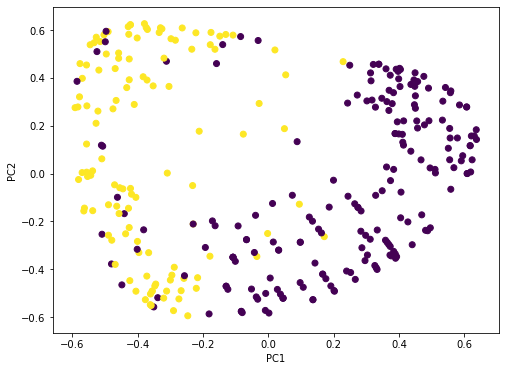

In [15]:
plt.figure(figsize = (8,6))
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')

#### visualize the kernel PCA on test set

Text(0, 0.5, 'PC2')

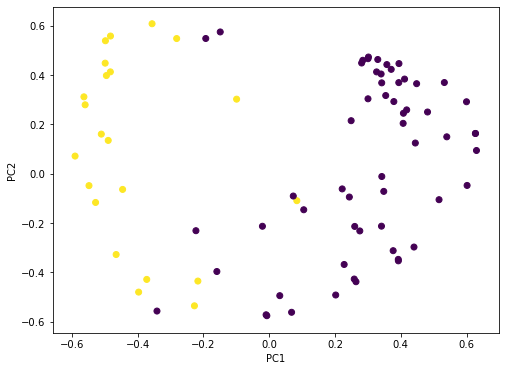

In [16]:
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [17]:
print(X_train)

[[-3.83607436e-01  4.04957932e-01]
 [-5.11368814e-01  1.18636617e-01]
 [ 6.06829131e-01  2.78485328e-01]
 [ 5.78434111e-01  1.48821345e-01]
 [-4.64437314e-01 -1.36534123e-01]
 [-2.30498505e-01 -2.11048241e-01]
 [-6.71846808e-02 -2.76476753e-01]
 [-4.26269108e-01  3.92253354e-01]
 [-2.90675654e-01 -5.73353047e-01]
 [-3.72681869e-02 -5.15989008e-01]
 [-1.24260577e-01 -4.84161557e-01]
 [-3.70575022e-01  6.02780064e-01]
 [ 5.84936369e-01  2.86987566e-01]
 [ 5.54923768e-01  1.88774305e-01]
 [ 3.91084709e-01  4.36387664e-01]
 [ 2.28551888e-01  4.68166933e-01]
 [ 5.58460104e-01  3.45722087e-01]
 [-3.55952368e-01 -4.91578213e-01]
 [-5.38449949e-01  1.12345862e-02]
 [-4.10930369e-01  2.89079883e-01]
 [-1.81767109e-01 -5.87096306e-01]
 [-1.75908861e-01  5.90360636e-01]
 [ 2.02113155e-01 -4.92213421e-01]
 [-2.64033093e-01  6.09003519e-01]
 [-4.01023119e-01 -2.83781184e-01]
 [-5.92088134e-01  2.75601978e-01]
 [ 1.36212721e-01 -5.27649168e-01]
 [ 1.66065398e-01 -4.20625355e-01]
 [ 3.32630436e-01 -4

In [18]:
print(X_test)

[[ 0.30028195  0.30360434]
 [ 0.20211315 -0.49221342]
 [ 0.24359731 -0.09478844]
 [ 0.40716492  0.20400774]
 [ 0.39238444 -0.34765072]
 [ 0.44418715  0.1242272 ]
 [ 0.34228443 -0.01157888]
 [-0.35620612  0.60803702]
 [ 0.37085269  0.4230471 ]
 [-0.34126244 -0.55723938]
 [ 0.60159053 -0.04779933]
 [ 0.63009545  0.09394223]
 [ 0.25848255 -0.42739655]
 [-0.02063839 -0.21335142]
 [ 0.300394    0.46630891]
 [-0.14891724  0.57470183]
 [ 0.10494989 -0.14641883]
 [ 0.28453852  0.45981265]
 [-0.49875191  0.44817296]
 [ 0.27540419 -0.23229164]
 [ 0.39262302 -0.35361978]
 [-0.48259342  0.55812771]
 [-0.00720926 -0.57612667]
 [-0.55962508  0.27926389]
 [ 0.48131384  0.25002676]
 [-0.49797902  0.53901606]
 [ 0.34199589  0.36825539]
 [ 0.41791482  0.25862618]
 [ 0.22783622 -0.36834254]
 [ 0.24906948  0.21480298]
 [ 0.30164363  0.47298151]
 [ 0.08393338 -0.10959085]
 [-0.52792781 -0.11681961]
 [ 0.26378233 -0.43826384]
 [ 0.59980186  0.29158913]
 [ 0.4114767   0.38362023]
 [ 0.3944069   0.44646747]
 

### fitting Linear Regression to train set

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict the test_set 

In [20]:
y_pred = classifier.predict(X_test)

### Evaluate the prediction

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[54  4]
 [ 4 18]]
0.9


### visualizing the training set result 

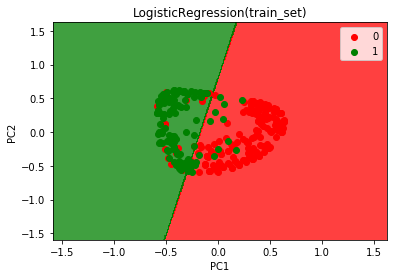

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('LogisticRegression(train_set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

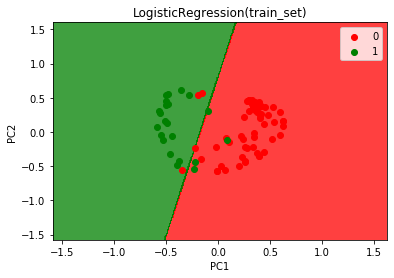

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('LogisticRegression(train_set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()